In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
etf = pd.read_csv('ETFs_noblank.csv')
etf.head()

,fund_name,fund_extended_name,category,fund_family,net_assets,ytd_return,fund_yield,legal_type,investment,size,...,fund_sharpe_ratio_5years,category_sharpe_ratio_5years,fund_sharpe_ratio_10years,category_sharpe_ratio_10years,fund_treynor_ratio_3years,category_treynor_ratio_3years,fund_treynor_ratio_5years,category_treynor_ratio_5years,fund_treynor_ratio_10years,category_treynor_ratio_10years
0,1305,Daiwa ETF TOPIX,NaN,Daiwa Asset Management Co Ltd,4.010000e+12,NaN,1.84,Exchange Traded Fund,Blend,Large,...,0.59,NaN,0.60,NaN,3.92,NaN,8.01,NaN,9.29,NaN
1,1306,Nomura TOPIX ETF,NaN,Nomura Asset Management Co Ltd,8.430000e+12,NaN,1.77,Exchange Traded Fund,Blend,Large,...,0.59,NaN,0.61,NaN,3.94,NaN,8.03,NaN,9.33,NaN
2,1308,Nikko Exchange Traded Index TOPIX,NaN,Nikko Asset Management Co Ltd,3.730000e+12,NaN,1.84,Exchange Traded Fund,Blend,Large,...,0.59,NaN,0.60,NaN,3.93,NaN,8.03,NaN,9.31,NaN
3,1309,Nomura SSE50 Index Link ETF,NaN,Nomura Asset Management Co Ltd,4.450000e+09,NaN,0.00,Exchange Traded Fund,Value,Large,...,0.36,NaN,0.26,NaN,-4.41,NaN,6.32,NaN,4.29,NaN
4,1310,Daiwa ETF TOPIX Core 30,NaN,Daiwa Asset Management Co Ltd,1.920000e+09,NaN,2.57,Exchange Traded Fund,Blend,Large,...,0.34,NaN,0.44,NaN,1.00,NaN,4.08,NaN,6.18,NaN


In [15]:
etf = etf.fillna(0)
etf

,fund_name,fund_extended_name,category,fund_family,net_assets,ytd_return,fund_yield,legal_type,investment,size,...,fund_sharpe_ratio_5years,category_sharpe_ratio_5years,fund_sharpe_ratio_10years,category_sharpe_ratio_10years,fund_treynor_ratio_3years,category_treynor_ratio_3years,fund_treynor_ratio_5years,category_treynor_ratio_5years,fund_treynor_ratio_10years,category_treynor_ratio_10years
0,1305,Daiwa ETF TOPIX,0,Daiwa Asset Management Co Ltd,4.010000e+12,0.00,1.84,Exchange Traded Fund,Blend,Large,...,0.59,0.00,0.60,0.00,3.92,0.00,8.01,0.00,9.29,0.00
1,1306,Nomura TOPIX ETF,0,Nomura Asset Management Co Ltd,8.430000e+12,0.00,1.77,Exchange Traded Fund,Blend,Large,...,0.59,0.00,0.61,0.00,3.94,0.00,8.03,0.00,9.33,0.00
2,1308,Nikko Exchange Traded Index TOPIX,0,Nikko Asset Management Co Ltd,3.730000e+12,0.00,1.84,Exchange Traded Fund,Blend,Large,...,0.59,0.00,0.60,0.00,3.93,0.00,8.03,0.00,9.31,0.00
3,1309,Nomura SSE50 Index Link ETF,0,Nomura Asset Management Co Ltd,4.450000e+09,0.00,0.00,Exchange Traded Fund,Value,Large,...,0.36,0.00,0.26,0.00,-4.41,0.00,6.32,0.00,4.29,0.00
4,1310,Daiwa ETF TOPIX Core 30,0,Daiwa Asset Management Co Ltd,1.920000e+09,0.00,2.57,Exchange Traded Fund,Blend,Large,...,0.34,0.00,0.44,0.00,1.00,0.00,4.08,0.00,6.18,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,YLDE,ClearBridge Dividend Strategy ESG ETF,Large Blend,Legg Mason,4.370000e+06,16.63,1.83,Exchange Traded Fund,Blend,Large,...,0.00,1.34,0.00,0.48,0.00,10.38,0.00,15.73,0.00,6.54
1605,YMLI,VanEck Vectors High Income Infrastructure MLP ETF,Energy Limited Partnership,VanEck,1.909000e+07,12.12,7.10,Exchange Traded Fund,Value,Medium,...,-0.09,0.19,0.00,0.00,7.36,-5.70,-3.03,1.89,0.00,0.00
1606,YMLP,VanEck Vectors High Income MLP ETF,Energy Limited Partnership,VanEck,4.241000e+07,21.71,8.16,Exchange Traded Fund,Value,Small,...,-0.64,0.19,0.00,0.00,5.84,-5.70,-11.90,1.89,0.00,0.00
1607,YYY,YieldShares High Income ETF,Tactical Allocation,YieldShares,2.164600e+08,13.82,8.86,Exchange Traded Fund,Value,Large,...,0.30,0.34,0.00,0.00,5.33,1.54,1.84,2.89,0.00,0.00


In [16]:
X = etf[['net_assets', 'basic_materials', 'consumer_cyclical', 'financial_services', 'real_estate', 'consumer_defensive', 'healthcare', 'utilities', 'communication_services', 'energy', 'industrials', 'technology', 'fund_sharpe_ratio_3years', 'fund_standard_deviation_3years', 'fund_beta_3years']]
y = etf[['fund_return_1year']]
print(X.shape, y.shape)

(1609, 15) (1609, 1)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


In [20]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.45364141329132235
Testing Score: 0.4094677173312843


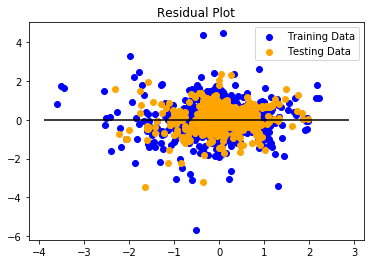

In [22]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [32]:
# new_data = np.array([[0.5, 0.5]])
# plt.scatter(X[:, 0], X[:, 1], c=y)
# plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)

In [34]:
# new_data = np.array([[0.5, 0.5]])
# predictions = model.predict(new_data)
# print("Classes are either 0 (orange) or 1 (blue)")
# print(f"The new point was classified as: {predictions}")

In [23]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5356869988186702, R2: 0.4094677173312843


In [24]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5320512074582454, R2: 0.4134757522026059


In [25]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5357236969216487, R2: 0.40942726196356155


In [26]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5326003169631558, R2: 0.4128704231763558


In [29]:
# #from 01-07

# fig1 = plt.figure(figsize=(12, 6))
# axes1 = fig1.add_subplot(1, 2, 1)
# axes2 = fig1.add_subplot(1, 2, 2)

# axes1.set_title("Original Data")
# axes2.set_title("Scaled Data")

# maxx = X_train["fund_sharpe_ratio_3years"].max()
# maxy = y_train.max()
# axes1.set_xlim(-maxx + 1, maxx + 1)
# axes1.set_ylim(-maxy + 1, maxy + 1)
# # line13: ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# axes2.set_xlim(-2, 2)
# axes2.set_ylim(-2, 2)

# def set_axes(ax):
#     ax.spines['left'].set_position('center')
#     ax.spines['right'].set_color('none')
#     ax.spines['bottom'].set_position('center')
#     ax.spines['top'].set_color('none')
#     ax.xaxis.set_ticks_position('bottom')
#     ax.yaxis.set_ticks_position('left')
    
# set_axes(axes1)
# set_axes(axes2)

# axes1.scatter(X_train["fund_sharpe_ratio_3years"], y_train)
# axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [35]:
# From 2-03
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(etf.data, etf.target)

AttributeError: 'DataFrame' object has no attribute 'data'